In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Read each CSV into a `DataFrame`.

In [3]:
hallelujah_path = Path('../import-hallelujah-new-split-no-nrs/data/good_hallelujah_trials_and_signals_q90_javier_all_no_nrs.csv')
into_dust_path = Path('../import-dust-new-split-no-nrs/data/good_into_dust_trials_and_signals_q90_javier_all_no_nrs.csv')
# raining_blood_path = Path('data', 'good_raining_blood_trials_and_signals_q90_javier_all.csv')

hallelujah_df = pd.read_csv(hallelujah_path, index_col='_id')
into_dust_df = pd.read_csv(into_dust_path, index_col='_id')
# raining_blood_df = pd.read_csv(raining_blood_path, index_col='_id')

Concatenate all song `DataFrame`s into a master `DataFrame`.

In [4]:
all_df = pd.concat([hallelujah_df, into_dust_df], axis=0, sort=False)

In [5]:
pd.set_option('display.max_columns', None)
all_df.describe()

,answers.age,answers.personality.trusting,answers.personality.artistic,answers.personality.imagination,answers.personality.reserved,answers.personality.outgoing,answers.personality.lazy,answers.personality.stress,answers.personality.nervous,answers.personality.fault,answers.personality.thorough,answers.musical_expertise,answers.concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,answers.visual_impairments,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,control_chillsshiversthrills,song_chillsshiversthrills,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,answers.musicpref.traditional_irish,answers.musicpref.world,answers.musicpref.dance,answers.musicpref.rock,answers.musicpref.jazz,answers.musicpref.hip_hop,answers.musicpref.none,answers.musicpref.classical,answers.musicpref.hiphop,answers.musicpref.pop,answers.musicpref.folk
count,321.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,210.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,144.000000,279.000000,300.000000,279.000000,279.000000,279.000000,279.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000,43.000000,22.000000,22.000000,22.000000,43.000000,43.000000,22.000000,22.000000,22.000000,0.0,134.000000,0.0,0.0,0.0,0.0,21.000000,21.000000,21.000000,21.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,156.000000,321.000000,321.000000,321.000000,321.000000
mean,25.532710,3.739837,2.455285,3.894309,3.195122,3.219512,3.577236,3.219512,3.504065,3.195122,3.105691,2.604762,4.008130,3.203252,3.162602,3.544715,3.243902,3.056911,3.333333,-1.0,3.381944,3.236559,3.886667,3.186380,3.419355,3.268817,2.566308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681818,3.093023,2.863636,2.000000,2.545455,3.441860,3.372093,2.363636,2.727273,2.136364,NaN,2.007463,NaN,NaN,NaN,NaN,3.142857,3.285714,1.619048,3.619048,0.112150,0.186916,0.221184,0.538941,0.180685,0.140187,0.019231,0.299065,0.043614,0.638629,0.037383
std,13.888384,1.077622,1.325983,1.046564,1.149900,1.244902,1.261070,1.204749,1.203642,1.219100,1.151001,1.120055,1.036197,1.180159,1.416379,1.154123,1.237008,1.125712,1.142808,0.0,1.327475,1.422313,1.165483,1.469484,1.045607,1.239109,1.486780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.170525,1.230833,1.355604,1.154701,1.335496,1.181249,1.291423,1.328997,1.351606,1.082126,NaN,1.253544,NaN,NaN,NaN,NaN,1.062342,1.230563,0.740013,0.864650,0.316043,0.390453,0.415692,0.499260,0.385358,0.347723,0.137777,0.458563,0.204553,0.481148,0.189995
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,-1.0,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,1.000000,1.000

# Data Cleanup

Drop `answers.` and `metadata.` from column names.

In [6]:
def strip_prefix(prefix=''):
    def strip_fn(s):
        if s.startswith(prefix):
            return s[len(prefix):]
        return s
    return strip_fn

In [7]:
strip_answers = strip_prefix('answers.')
all_df = all_df.rename(strip_answers, axis='columns')

strip_metadata = strip_prefix('metadata.')
all_df = all_df.rename(strip_metadata, axis='columns')

In [8]:
for c in all_df.columns:
    new_c = c.replace('.', '_')
    mapper_dict = {}
    mapper_dict[c] = new_c
    all_df = all_df.rename(mapper=mapper_dict, axis='columns')

In [9]:
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,musical_expertise,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,control_chillsshiversthrills,song_chillsshiversthrills,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,musicpref_traditional_irish,musicpref_world,musicpref_dance,musicpref_rock,musicpref_jazz,musicpref_hip_hop,musicpref_none,musicpref_classical,musicpref_hiphop,musicpref_pop,musicpref_folk
count,321.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,210.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,144.000000,279.000000,300.000000,279.000000,279.000000,279.000000,279.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000,43.000000,22.000000,22.000000,22.000000,43.000000,43.000000,22.000000,22.000000,22.000000,0.0,134.000000,0.0,0.0,0.0,0.0,21.000000,21.000000,21.000000,21.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,156.000000,321.000000,321.000000,321.000000,321.000000
mean,25.532710,3.739837,2.455285,3.894309,3.195122,3.219512,3.577236,3.219512,3.504065,3.195122,3.105691,2.604762,4.008130,3.203252,3.162602,3.544715,3.243902,3.056911,3.333333,-1.0,3.381944,3.236559,3.886667,3.186380,3.419355,3.268817,2.566308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681818,3.093023,2.863636,2.000000,2.545455,3.441860,3.372093,2.363636,2.727273,2.136364,NaN,2.007463,NaN,NaN,NaN,NaN,3.142857,3.285714,1.619048,3.619048,0.112150,0.186916,0.221184,0.538941,0.180685,0.140187,0.019231,0.299065,0.043614,0.638629,0.037383
std,13.888384,1.077622,1.325983,1.046564,1.149900,1.244902,1.261070,1.204749,1.203642,1.219100,1.151001,1.120055,1.036197,1.180159,1.416379,1.154123,1.237008,1.125712,1.142808,0.0,1.327475,1.422313,1.165483,1.469484,1.045607,1.239109,1.486780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.170525,1.230833,1.355604,1.154701,1.335496,1.181249,1.291423,1.328997,1.351606,1.082126,NaN,1.253544,NaN,NaN,NaN,NaN,1.062342,1.230563,0.740013,0.864650,0.316043,0.390453,0.415692,0.499260,0.385358,0.347723,0.137777,0.458563,0.204553,0.481148,0.189995
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,-1.0,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.250000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## `answers.musical_expertise`

Replace missing values with column median.

In [10]:
np.any(all_df.musical_expertise.isna())

True

In [11]:
all_df.musical_expertise.fillna(0, inplace=True)

In [12]:
def column_hist(col):
    bins = np.arange(col.min() - 0.5, col.max() + 1.5, 1)
    plt.hist(col, bins=bins)
    plt.title('Histogram for ' + col.name);

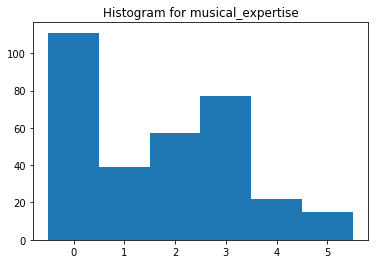

In [13]:
column_hist(all_df.musical_expertise)

In [14]:
all_df.musical_expertise.value_counts()

0.0    111
3.0     77
2.0     57
1.0     39
4.0     22
5.0     15
Name: musical_expertise, dtype: int64

In [15]:
np.any(all_df.musical_expertise.isna())

False

In [16]:
all_df.loc[:, 'musical_expertise'] = all_df.loc[:, 'musical_expertise'].astype('int').astype('category')

## `age`

Check for missing values.

In [17]:
np.any(all_df.age.isna())

False

In [18]:
q25, q75 = all_df.age.quantile(q=.25), all_df.age.quantile(q=.75)
q25, q75

(16.0, 31.0)

In [19]:
iqr = q75 - q25
iqr

15.0

In [20]:
low_cut, high_cut = q25 - (2 * iqr), q75 + (2 * iqr)
low_cut, high_cut

(-14.0, 61.0)

In [21]:
age_outliers = all_df.age[(all_df.age < 6) | (all_df.age > 100)]
age_outliers

_id
570eb76d83a73509d0e0359e    1.0
570eb72b83a73509d0e01f7c    5.0
Name: age, dtype: float64

In [22]:
age_outlier_idx = age_outliers.index
age_outlier_idx

Index(['570eb76d83a73509d0e0359e', '570eb72b83a73509d0e01f7c'], dtype='object', name='_id')

In [23]:
all_df = all_df.drop(index=age_outlier_idx)
age_outliers = all_df.age[(all_df.age < 6) | (all_df.age > 100)]
age_outliers

Series([], Name: age, dtype: float64)

## `control_chillsshiversthrills`

In [24]:
np.any(all_df.control_chillsshiversthrills.isna())

True

In [25]:
all_df.control_chillsshiversthrills.value_counts()

Series([], Name: control_chillsshiversthrills, dtype: int64)

Drop column, as there are no valid values.

In [26]:
all_df = all_df.drop(columns='control_chillsshiversthrills')

In [27]:
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,song_chillsshiversthrills,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,musicpref_traditional_irish,musicpref_world,musicpref_dance,musicpref_rock,musicpref_jazz,musicpref_hip_hop,musicpref_none,musicpref_classical,musicpref_hiphop,musicpref_pop,musicpref_folk
count,319.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,142.000000,277.000000,298.000000,277.000000,277.000000,277.000000,277.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000,43.000000,22.000000,22.000000,22.000000,43.000000,43.000000,22.000000,22.000000,22.000000,134.000000,0.0,0.0,0.0,0.0,21.000000,21.000000,21.000000,21.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,154.000000,319.000000,319.000000,319.000000,319.000000
mean,25.673981,3.719008,2.438017,3.876033,3.173554,3.214876,3.570248,3.206612,3.487603,3.181818,3.082645,4.008264,3.190083,3.148760,3.528926,3.223140,3.049587,3.322314,-1.0,3.380282,3.223827,3.879195,3.173285,3.407942,3.256318,2.563177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681818,3.093023,2.863636,2.000000,2.545455,3.441860,3.372093,2.363636,2.727273,2.136364,2.007463,NaN,NaN,NaN,NaN,3.142857,3.285714,1.619048,3.619048,0.112853,0.188088,0.222571,0.542320,0.178683,0.141066,0.019481,0.297806,0.043887,0.639498,0.037618
std,13.815279,1.074113,1.315881,1.045389,1.145118,1.239668,1.263767,1.203587,1.204960,1.217922,1.144456,1.036789,1.178375,1.418104,1.155237,1.234825,1.131748,1.141745,0.0,1.324790,1.419485,1.165802,1.466637,1.040663,1.234764,1.481950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.170525,1.230833,1.355604,1.154701,1.335496,1.181249,1.291423,1.328997,1.351606,1.082126,1.253544,NaN,NaN,NaN,NaN,1.062342,1.230563,0.740013,0.864650,0.316910,0.391396,0.416626,0.498989,0.383689,0.348636,0.138657,0.458012,0.205166,0.480900,0.190568
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,-1.0,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.250000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.0000

## `control_activity`

In [28]:
np.any(all_df.control_activity.isna())

True

In [29]:
all_df.control_activity.median()

3.0

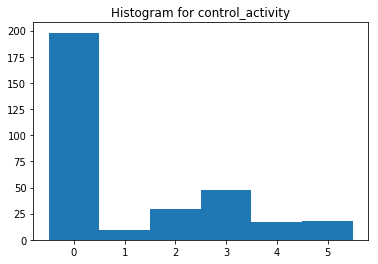

In [30]:
all_df.control_activity.fillna(0, inplace=True)
column_hist(all_df.control_activity)

In [31]:
np.any(all_df.control_activity.isna())

False

In [32]:
all_df.loc[:, 'control_activity'] = all_df.loc[:, 'control_activity'].astype('int').astype('category')

## `control_tension`

In [33]:
np.any(all_df.control_tension.isna())

True

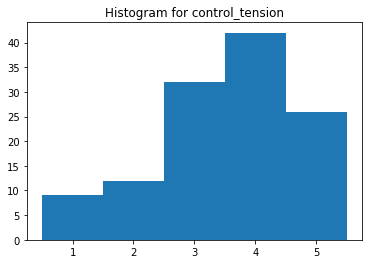

In [34]:
column_hist(all_df.control_tension)

In [35]:
all_df.control_tension.median()

4.0

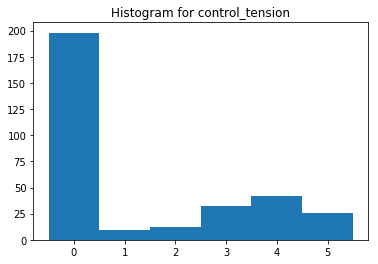

In [36]:
all_df.control_tension.fillna(0, inplace=True)
column_hist(all_df.control_tension)

In [37]:
np.any(all_df.control_tension.isna())

False

In [38]:
all_df.loc[:, 'control_tension'] = all_df.loc[:, 'control_tension'].astype('int').astype('category')

## `control_familiarity`

Drop this column, as it doesn't make any sense.

In [39]:
all_df = all_df.drop(columns='control_familiarity')
all_df.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,concentration,control_power,control_like_dislike,control_engagement,control_positivity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,visual_impairments,control_inspired,control_wonder,control_spirituality,control_thrills,control_chills,control_tenderness,control_nostalgia,control_goosebumps,control_overwhelmed,control_shivers,song_inspired,song_wonder,song_spirituality,song_thrills,song_chills,song_tenderness,song_nostalgia,song_goosebumps,song_overwhelmed,song_shivers,song_chillsshiversthrills,control_transcendence,control_sadness,control_joyfulactivation,control_peacefulness,song_transcendence,song_sadness,song_joyfulactivation,song_peacefulness,musicpref_traditional_irish,musicpref_world,musicpref_dance,musicpref_rock,musicpref_jazz,musicpref_hip_hop,musicpref_none,musicpref_classical,musicpref_hiphop,musicpref_pop,musicpref_folk
count,319.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,142.000000,277.000000,298.000000,277.000000,277.000000,277.000000,277.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.000000,43.000000,22.000000,22.000000,22.000000,43.000000,43.000000,22.000000,22.000000,22.000000,134.000000,0.0,0.0,0.0,0.0,21.000000,21.000000,21.000000,21.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,154.000000,319.000000,319.000000,319.000000,319.000000
mean,25.673981,3.719008,2.438017,3.876033,3.173554,3.214876,3.570248,3.206612,3.487603,3.181818,3.082645,4.008264,3.190083,3.148760,3.223140,3.322314,3.380282,3.223827,3.879195,3.173285,3.407942,3.256318,2.563177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.681818,3.093023,2.863636,2.000000,2.545455,3.441860,3.372093,2.363636,2.727273,2.136364,2.007463,NaN,NaN,NaN,NaN,3.142857,3.285714,1.619048,3.619048,0.112853,0.188088,0.222571,0.542320,0.178683,0.141066,0.019481,0.297806,0.043887,0.639498,0.037618
std,13.815279,1.074113,1.315881,1.045389,1.145118,1.239668,1.263767,1.203587,1.204960,1.217922,1.144456,1.036789,1.178375,1.418104,1.234825,1.141745,1.324790,1.419485,1.165802,1.466637,1.040663,1.234764,1.481950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.170525,1.230833,1.355604,1.154701,1.335496,1.181249,1.291423,1.328997,1.351606,1.082126,1.253544,NaN,NaN,NaN,NaN,1.062342,1.230563,0.740013,0.864650,0.316910,0.391396,0.416626,0.498989,0.383689,0.348636,0.138657,0.458012,0.205166,0.480900,0.190568
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.250000,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.500000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000

## `control_engagement`

In [40]:
np.any(all_df.control_engagement.isna())

True

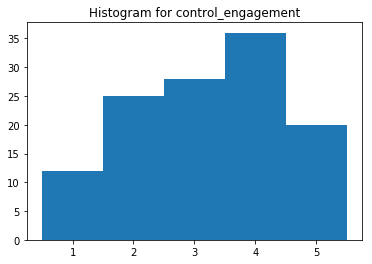

In [41]:
column_hist(all_df.control_engagement)

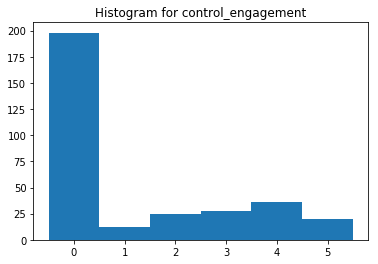

In [42]:
all_df.control_engagement.fillna(0, inplace=True)
column_hist(all_df.control_engagement)

In [43]:
all_df.loc[:, 'control_engagement'] = all_df.loc[:, 'control_engagement'].astype('int').astype('category')

## Fill other appropriate columns' NA values with 0 and 'categorify'

In [44]:
cols_to_fill_with_zero = [
    'control_positivity','control_like_dislike','song_chillsshiversthrills','song_activity','song_tension',
    'song_familiarity','song_engagement','song_positivity','song_like_dislike','song_inspired','song_wonder',
    'song_spirituality','song_thrills','song_chills','song_tenderness','song_nostalgia','song_goosebumps',
    'song_overwhelmed','song_shivers','control_power','song_transcendence','song_sadness','song_joyfulactivation',
    'song_peacefulness','song_power','personality_trusting','personality_artistic','personality_imagination',
    'personality_reserved','personality_outgoing','personality_lazy','personality_stress','personality_nervous',
    'personality_fault','personality_thorough','concentration','musicpref_traditional_irish','musicpref_jazz',
    'musicpref_folk','musicpref_hiphop','musicpref_classical','musicpref_none','musicpref_rock','musicpref_hip_hop',
    'musicpref_world','musicpref_pop','musicpref_dance','musical_background','visual_impairments',
    'hearing_impairments'
]

cols_to_drop = [
    'control_inspired','control_wonder','control_spirituality','control_thrills','control_chills',
    'control_tenderness','control_nostalgia','control_goosebumps','control_overwhelmed','control_shivers',
    'control_transcendence','control_sadness','control_joyfulactivation','control_peacefulness','dob'
]

In [45]:
for c in cols_to_fill_with_zero:
    try:
        all_df[c].fillna(0, inplace=True)
        all_df.loc[:, c] = all_df.loc[:, c].astype('int').astype('category')    
    except:
        pass

## Drop columns that don't make sense (e.g., familiarity with control stimulus)

In [46]:
for c in cols_to_drop:
    try:
        all_df = all_df.drop(columns=c)
    except:
        pass

Also drop `Unnamed: 0` column.

In [47]:
all_df = all_df.drop(columns='Unnamed: 0')

In [48]:
all_df.describe()

,age
count,319.000000
mean,25.673981
std,13.815279
min,6.000000
25%,16.000000
50%,21.000000
75%,31.000000
max,81.000000


## Fill NA values with column mode/'other' as appropriate

In [49]:
cols_to_fill_with_other = [
    'location', 'sex', 'nationality', 'language'
]

In [50]:
for c in cols_to_fill_with_other:
    all_df[c].fillna('other', inplace=True)

# Write out CSV

In [51]:
all_df.to_csv(Path('data', 'good_reaction_trials_categorified_q90_javier_all_no_nrs.csv'))

In [52]:
pd.read_csv(Path('data', 'good_reaction_trials_categorified_q90_javier_all_no_nrs.csv')).columns

Index(['_id', 'location', 'language', 'nationality', 'age', 'sex',
       'hearing_impairments', 'personality_trusting', 'personality_artistic',
       'personality_imagination', 'personality_reserved',
       'personality_outgoing', 'personality_lazy', 'personality_stress',
       'personality_nervous', 'personality_fault', 'personality_thorough',
       'musical_expertise', 'concentration', 'critical_reaction',
       'control_power', 'control_like_dislike', 'control_tension',
       'control_engagement', 'control_activity', 'control_positivity',
       'song_power', 'song_like_dislike', 'song_tension', 'song_engagement',
       'song_activity', 'song_positivity', 'song_familiarity',
       'musical_background', 'visual_impairments', 'song_inspired',
       'song_wonder', 'song_spirituality', 'song_thrills', 'song_chills',
       'song_tenderness', 'song_nostalgia', 'song_goosebumps',
       'song_overwhelmed', 'song_shivers', 'song_chillsshiversthrills',
       'song_transcendence',

# Thoughts

- Might want to look at treating Likert-type items as categorical and using a completely separate category for missing values, instead of filling them with the mean.
- Data augmentation to balance classes
- Exclude columns which are all the same for most people (chills, etc.)
- Take results from working with other songs and break out weighted F-beta scores for comparison with *Hallelujah*-only results